## Module: tf.keras.datasets.imdb

* IMDB sentiment classification dataset.
* 인터넷 영화 데이터 베이스 (Internet Movie Database)

In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

Epoch 1/5
250/250 [==============================] - 11s 40ms/step - loss: 0.4486 - accuracy: 0.7750 - val_loss: 0.3686 - val_accuracy: 0.8364
Epoch 2/5
250/250 [==============================] - 15s 59ms/step - loss: 0.2957 - accuracy: 0.8769 - val_loss: 0.3317 - val_accuracy: 0.8551
Epoch 3/5
250/250 [==============================] - 16s 64ms/step - loss: 0.2540 - accuracy: 0.8966 - val_loss: 0.3345 - val_accuracy: 0.8566
Epoch 4/5
250/250 [==============================] - 16s 64ms/step - loss: 0.2176 - accuracy: 0.9127 - val_loss: 0.3311 - val_accuracy: 0.8559
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.3657 - accuracy: 0.8502

 Test Accuracy : 0.8502


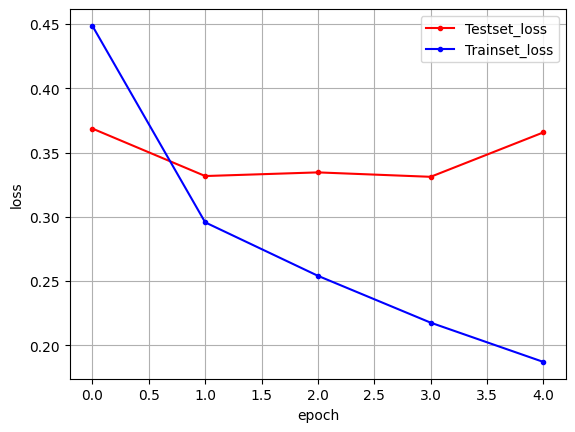

In [6]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print('\n Test Accuracy : %.4f' % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습 셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()